## Bike Sharing Assignment
### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands.

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dtm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1. Reading and Understanding Data

#### 1.1 Data Volume

In [2]:
# Load the data
df = pd.read_csv("day.csv")

In [3]:
# Checking the row and column counts
print("No. of rows = ", df.shape[0], "and no. of columns = ", df.shape[1])
print("Here is some sample records from top and bottom...")
# Print first 5 rows and last 5 rows
df.head(14).append(df.tail(14))

No. of rows =  730 and no. of columns =  16
Here is some sample records from top and bottom...


C:\Users\Admin\AppData\Local\Temp\ipykernel_26352\596956505.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(14).append(df.tail(14))


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### 1.2 Columns and their data types

In [4]:
#Print all the columns and their data types
print(df.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
# Count all data types of all columns
print(df.dtypes.value_counts())

int64      11
float64     4
object      1
dtype: int64


#### 1.3 Numeric and Categorical Columns

In [6]:
# Filter Numeric and Categorical Columns
numeric_columns = list(df.select_dtypes(exclude='object'))
categorical_columns = list(df.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 1
['dteday']
numeric columns length: 15
['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### 2. Data Cleaning

#### 2.1 Fixing rows and columns

In [7]:
df[numeric_columns].describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value , we have a default index for the same purpose

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month'. We can extract day from this columns for future analysis. hence, we can carry out our analysis without this column .

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [8]:
# Delete unidentified, irrelevant numeric columns base on schema description
df.drop(columns=['instant', 'casual', 'registered'], inplace=True)

In [9]:
# Delete unidentified, irrelevant categorical columns base on schema description
df.drop(columns=['dteday'], inplace=True)

In [10]:
# Filter Numeric vs Categorical Columns again
numeric_columns = list(df.select_dtypes(exclude='object'))
categorical_columns = list(df.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 0
[]
numeric columns length: 12
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [11]:
# Check duplicated rows
duplicated_rows = df.duplicated().value_counts()
df_number_of_duplicated_rows = pd.DataFrame(dict({"duplicated": duplicated_rows.index, "no_rows": duplicated_rows.values}))
print(df_number_of_duplicated_rows)

   duplicated  no_rows
0       False      730


<font color=red>Results: we saw above results, the dataset did not have any duplicated rows because the dataset has 730 rows and equal to 730 rows of False duplicated column.</font>

#### 2.2 Treating missing values

In [12]:
# Count number of columns have null value
count_nan_columns = (df.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 0


In [13]:
# Check number of rows have NaN values on number of columns over a row
number_of_nan_rows = df.isnull().sum(axis=1).sort_values(ascending=False).value_counts()
df_number_of_nan_rows = pd.DataFrame(dict({"no_columns": number_of_nan_rows.index, "no_rows": number_of_nan_rows.values}))
print(df_number_of_nan_rows)

   no_columns  no_rows
0           0      730


<font color=red>Results: we saw above results, the dataset did not have any missing values for columns or rows.</font>

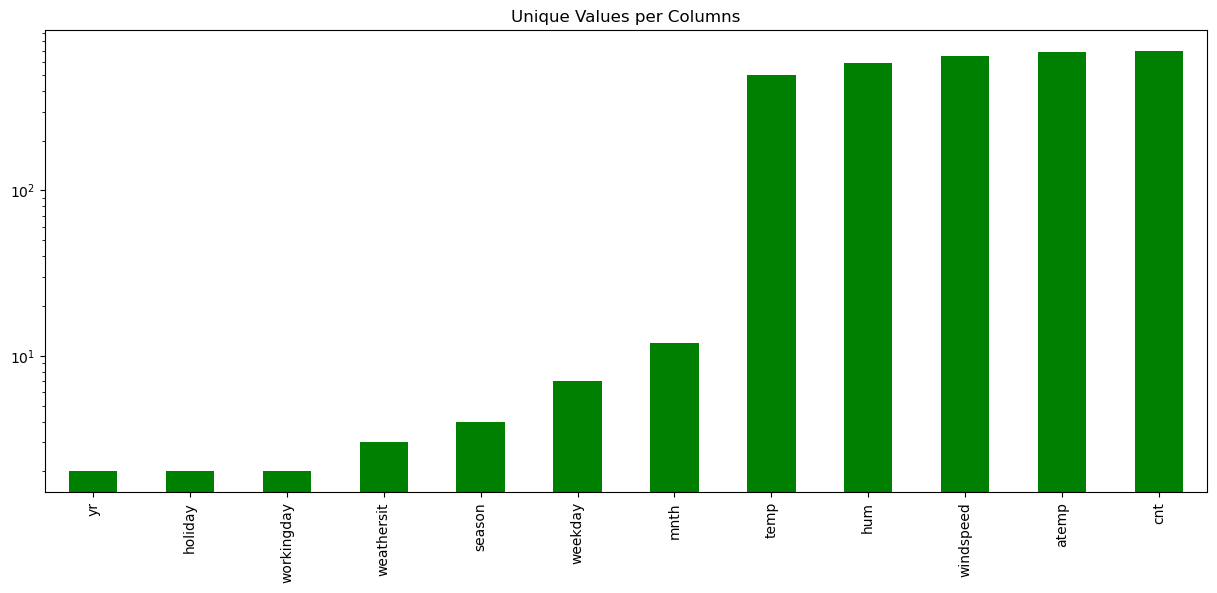

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64


In [14]:
# For each numerical feature compute number of unique entries
unique_values = df.nunique().sort_values()

# Plot information with y-axis in log-scale
ax = unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green")
plt.show()
# Print number of distinct elements in specified axis.
print(unique_values)

As above plot and result, we have ordered categorical columns such as yr, holiday, workingday, weathersit, season, weekday and mnth columns

In [15]:
categorical_columns = ['holiday', 'workingday', 'weathersit', 'season', 'weekday', 'yr']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 6
['holiday', 'workingday', 'weathersit', 'season', 'weekday', 'yr']
numeric columns length: 5
['temp', 'atemp', 'hum', 'windspeed', 'cnt']


#### 2.3 Standardising values

Map all non-binary categorical columns to their original values such as mnth, weekday, season, weathersit

In [16]:
# Mapping mnth column
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# Mapping weekday column
df['weekday'] = df['weekday'].map({1:'Mon',2:'Tue', 3:'Wed',4:'Thu',5: "Fri",6: "Sat",0: "Sun"})

In [18]:
# Mapping season column
df['season'] = df['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [19]:
# Mapping season column
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist', 3:'Rain',4:'Snow'})

In [20]:
# Checking dataset after mapping all non-binary columns to their original values
# Print first 5 rows and last 5 rows
df.head(10).append(df.tail(10))

C:\Users\Admin\AppData\Local\Temp\ipykernel_26352\1199251462.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(10).append(df.tail(10))


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


Correct data precision for temp, atemp, hum and windspeed

In [21]:
# Correct precision for temp and atemp
df['temp'] = round(df['temp'], 2)
df['atemp'] = round(df['atemp'], 2)

In [22]:
# Correct precision for hum and windspeed
df['hum'] = round(df['hum'], 2)
df['windspeed'] = round(df['windspeed'], 2)

In [23]:
# Print first 5 rows and last 5 rows
df.head(10).append(df.tail(10))

C:\Users\Admin\AppData\Local\Temp\ipykernel_26352\857745180.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(10).append(df.tail(10))


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.11,18.18,80.58,10.75,985
1,Spring,0,Jan,0,Sun,0,Mist,14.90,17.69,69.61,16.65,801
2,Spring,0,Jan,0,Mon,1,Clear,8.05,9.47,43.73,16.64,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.20,10.61,59.04,10.74,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.31,11.46,43.70,12.52,1600
5,Spring,0,Jan,0,Thu,1,Clear,8.38,11.66,51.83,6.00,1606
6,Spring,0,Jan,0,Fri,1,Mist,8.06,10.44,49.87,11.30,1510
7,Spring,0,Jan,0,Sat,0,Mist,6.76,8.11,53.58,17.88,959
8,Spring,0,Jan,0,Sun,0,Clear,5.67,5.81,43.42,24.25,822
9,Spring,0,Jan,0,Mon,1,Clear,6.18,7.54,48.29,14.96,1321


### 3. Visualising and Analysis data

Visualising Numeric Variables : Using a pairplot

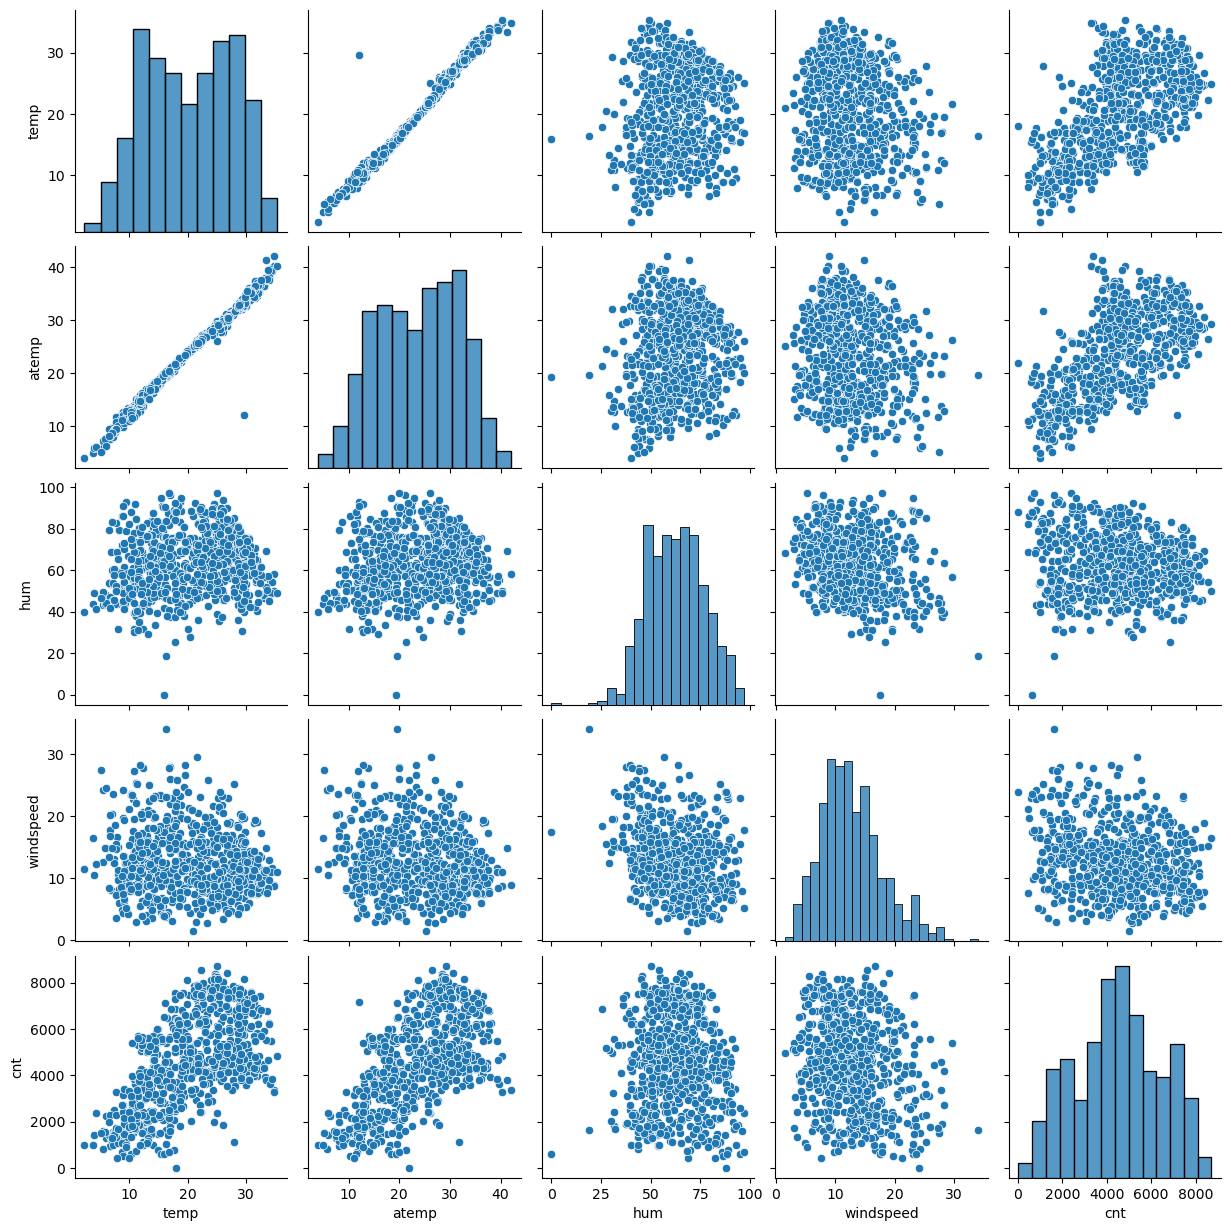

In [24]:
sns.pairplot(df[numeric_columns])
plt.show()

As above plots, we see that temp and atemp variables can consider to be a Linear Pattern and can consider to make a linear model.

Visualising Categorical Variables : Using a Boxplot

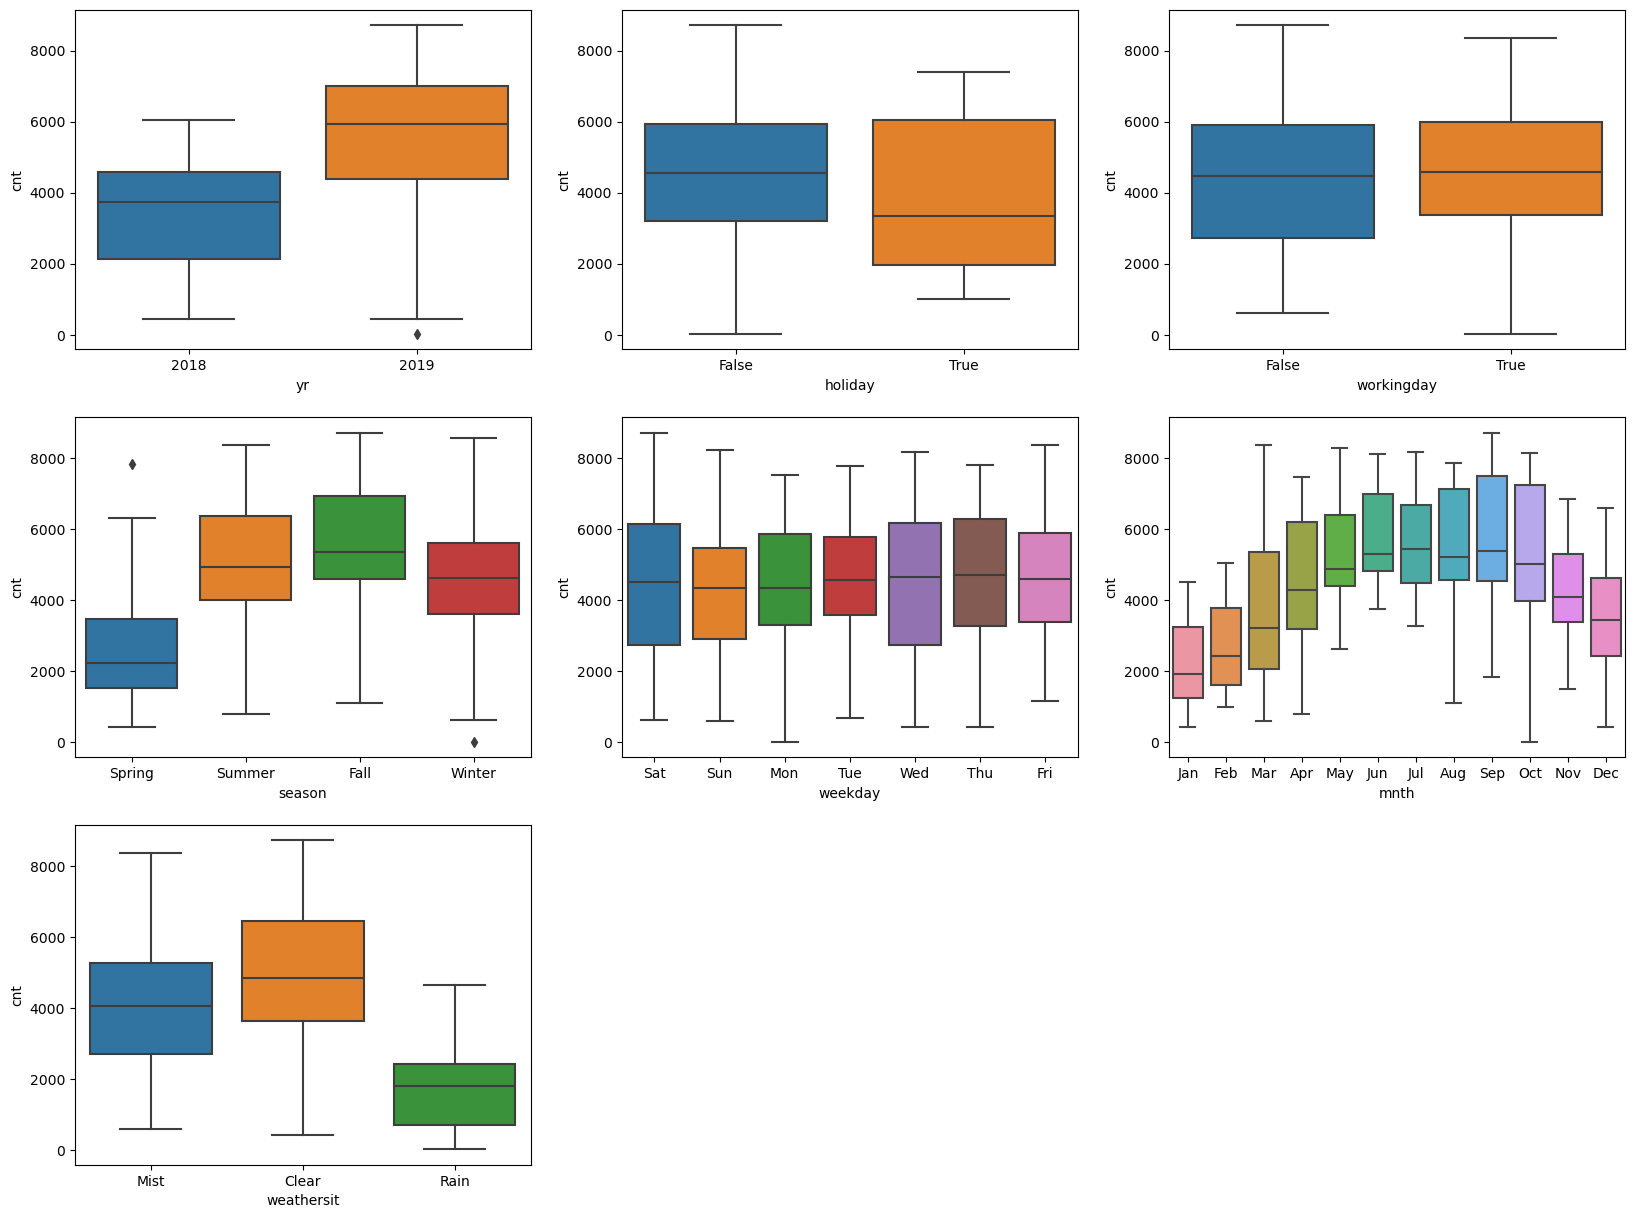

In [25]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='yr',y='cnt', data=df)
plt.xticks(ticks=[0,1], labels=['2018', '2019'])
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.subplot(3,3,4)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='mnth',y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

As above plots, we determine that season, weathersit and mnth variables can consider to use for analysis because they have different means obviously.

In order to determine the independent variables which impact to dependence/target variable (cnt variable) in dataset. We will combine and compare categorical variables and numerical variable together.

Compare between temp and atemp, weathersit and season to consider for keeping temp variable to build a linear model

<Figure size 1500x1000 with 0 Axes>

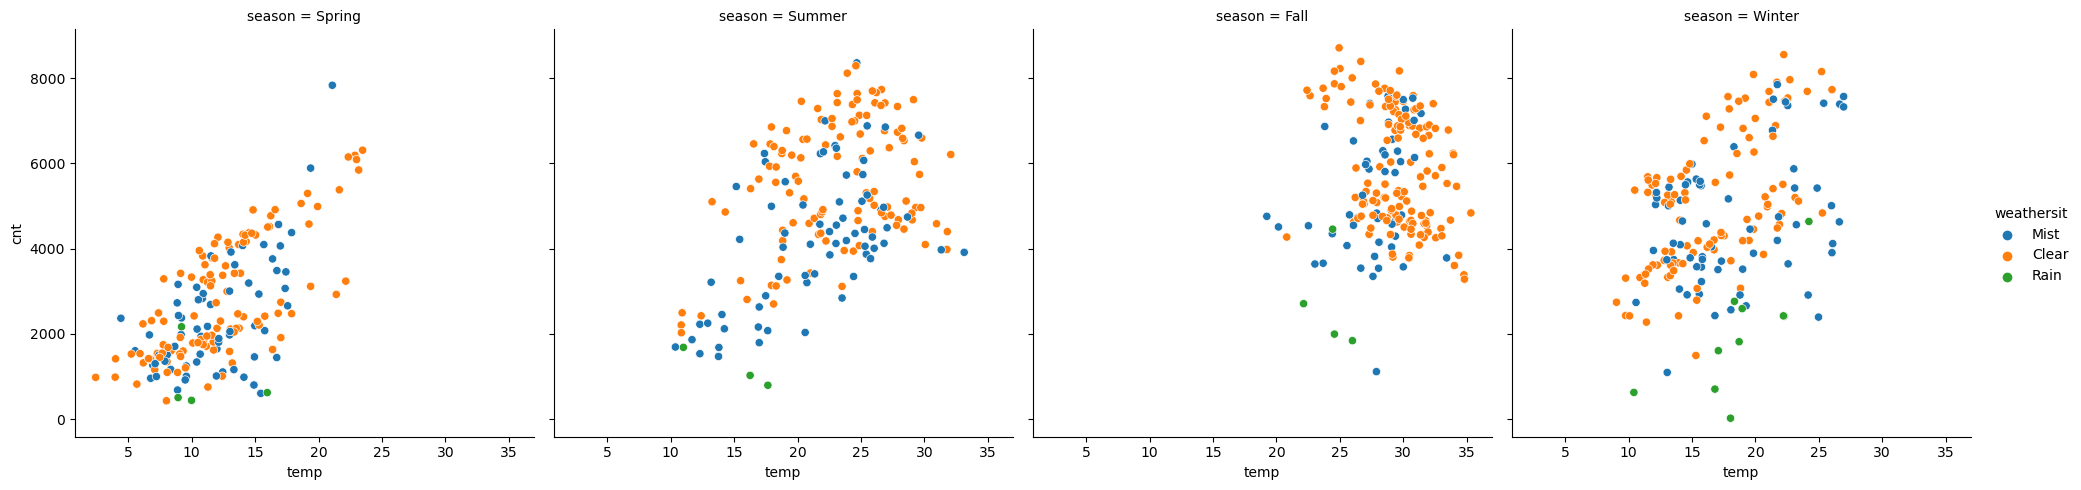

In [26]:
# Analysis temp, cnt, weathersit and season on scatter plots
plt.figure(figsize = (15, 10))
sns.relplot(data=df, x='temp', y='cnt', hue='weathersit', col='season')
plt.show()

<Figure size 1500x1000 with 0 Axes>

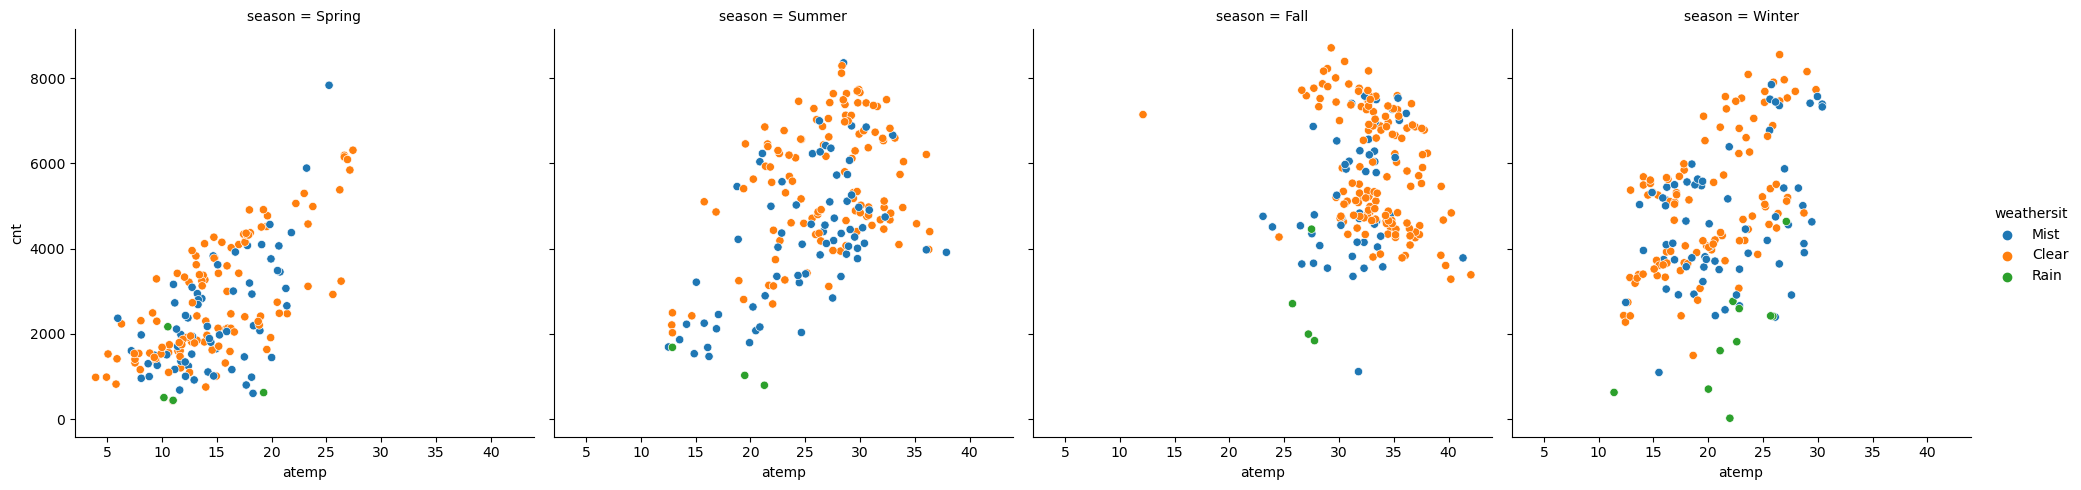

In [27]:
# Analysis atemp, cnt, weathersit and season on scatter plots
plt.figure(figsize = (15, 10))
sns.relplot(data=df, x='atemp', y='cnt', hue='weathersit', col='season')
plt.show()

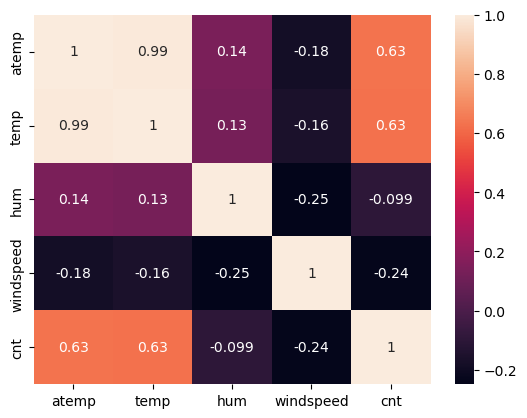

In [28]:
# Use heatmap to determine difference between atemp and temp variables
sns.heatmap(data=df[['atemp', 'temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

As above scatter and heatmap plot, we see that `atemp` and `temp` variables are not different correlated values to `cnt` variable so we can use `temp` or `atemp` variables

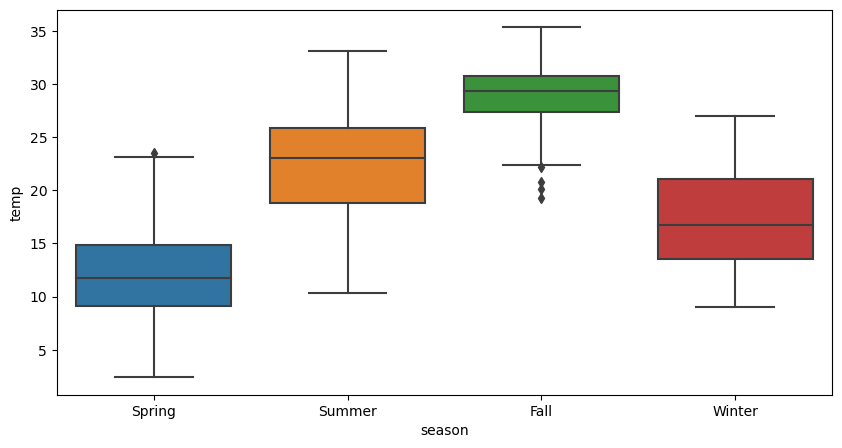

In [29]:
# Analysis season and temp
plt.figure(figsize = (10, 5))
sns.boxplot(data=df, x='season', y='temp')
plt.show()

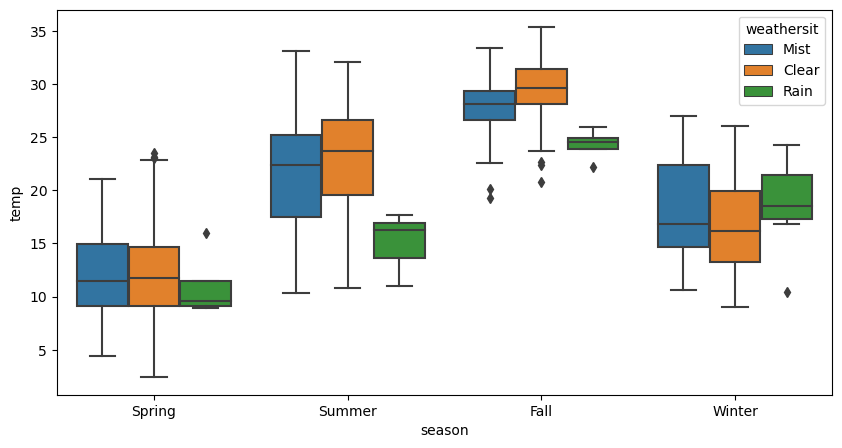

In [30]:
# Analysis season, temp and weathersit
plt.figure(figsize = (10, 5))
sns.boxplot(data=df, x='season', y='temp', hue='weathersit')
plt.show()

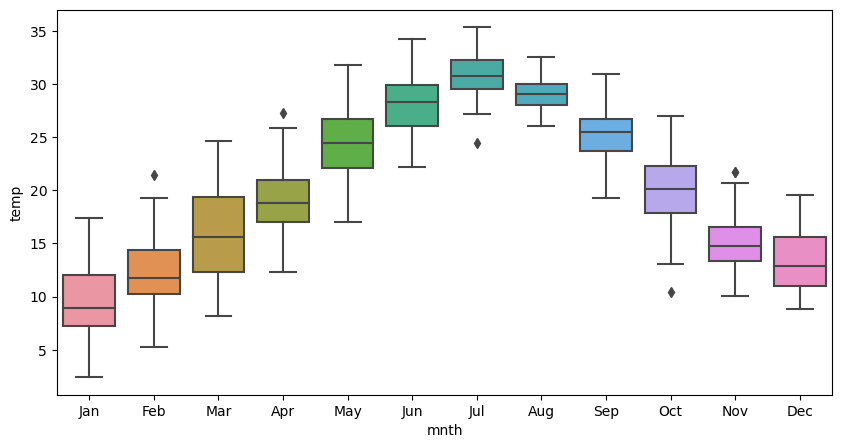

In [31]:
# Analysis mnth and temp
plt.figure(figsize = (10, 5))
sns.boxplot(data=df, x='mnth', y='temp')
plt.show()

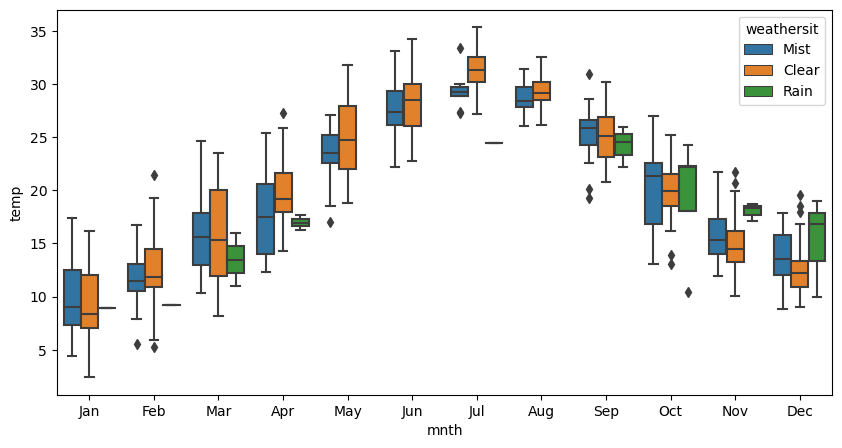

In [32]:
# Analysis mnth, temp and weathersit
plt.figure(figsize = (10, 5))
sns.boxplot(data=df, x='mnth', y='temp', hue='weathersit')
plt.show()

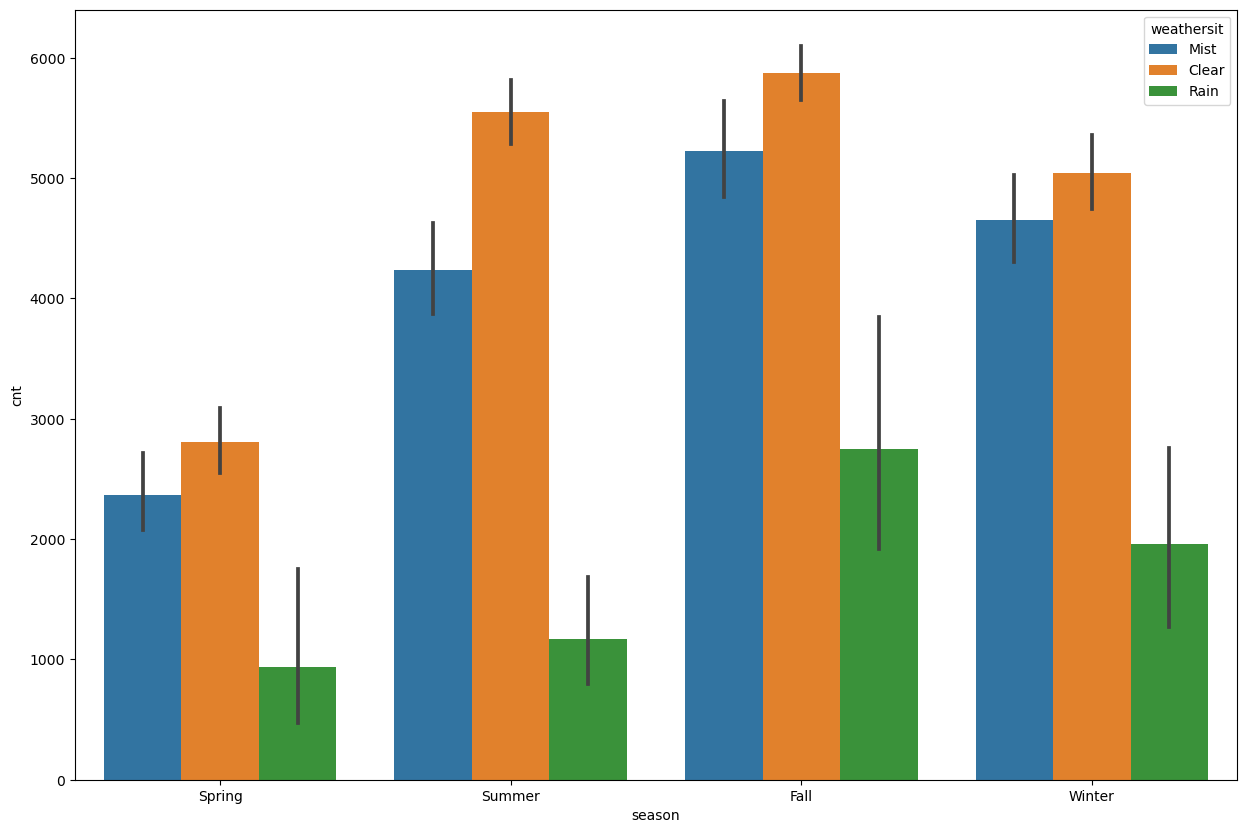

In [33]:
# Analysis season, cnt and weathersit
plt.figure(figsize = (15, 10))
sns.barplot(x ='season', y='cnt', hue='weathersit', data=df)
plt.show()

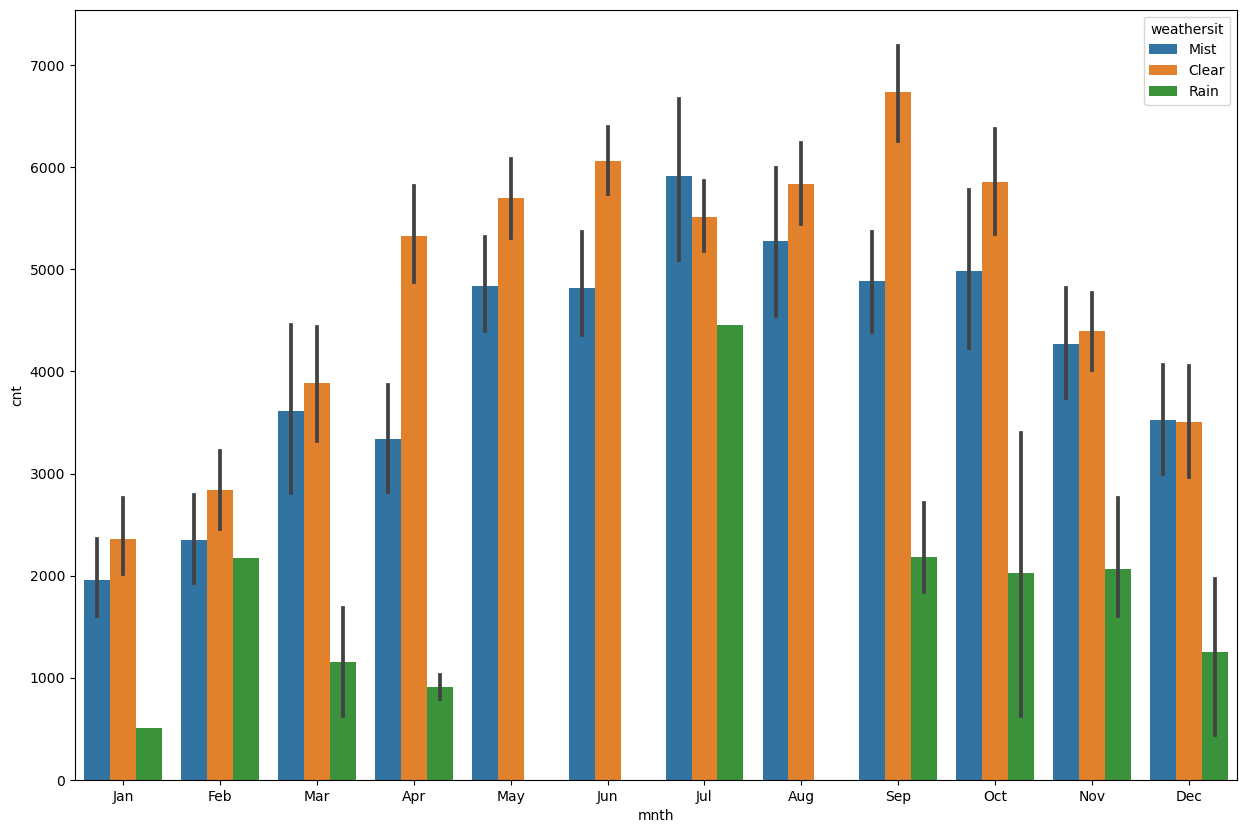

In [34]:
# Analysis mnth, cnt and weathersit
plt.figure(figsize = (15, 10))
sns.barplot(x='mnth', y='cnt', hue='weathersit', data=df)
plt.show()

<font color=red>Results</font>
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows the demand was high during this season. It is the least for 1: spring .
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week.
- The count of total users is in between 6000 to 7000 during clear weather on September
- The count is highest in the month of September
- The count of users is less during the holidays
- The count of users is less during the rain weather

#### Create dummy variables
The variables mnth, weekday, season and weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create dumy variables for these 4 categorical variables namely - mnth, weekday, season and weathersit.

In [35]:
df_updated_data = pd.get_dummies(data=df, columns=['season', 'mnth', 'weathersit', 'weekday'], drop_first=True)

# checking the data frame after adding dummy data
df_updated_data.shape

(730, 30)

In [36]:
# Print the first 5 rows
df_updated_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weathersit_Mist,weathersit_Rain,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,14.11,18.18,80.58,10.75,985,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.90,17.69,69.61,16.65,801,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
#Print all the columns and their data types
print(df_updated_data.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_Spring    730 non-null    uint8  
 9   season_Summer    730 non-null    uint8  
 10  season_Winter    730 non-null    uint8  
 11  mnth_Aug         730 non-null    uint8  
 12  mnth_Dec         730 non-null    uint8  
 13  mnth_Feb         730 non-null    uint8  
 14  mnth_Jan         730 non-null    uint8  
 15  mnth_Jul         730 non-null    uint8  
 16  mnth_Jun         730 non-null    uint8  
 17  mnth_Mar        

### 4. Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [38]:
df_train, df_test = train_test_split(df_updated_data,train_size=0.7,test_size=0.3,random_state=100)
print("Train dataset:")
print("No. of rows = ", df_train.shape[0], "and no. of columns = ", df_train.shape[1])
print("Test dataset:")
print("No. of rows = ", df_test.shape[0], "and no. of columns = ", df_test.shape[1])

Train dataset:
No. of rows =  510 and no. of columns =  30
Test dataset:
No. of rows =  219 and no. of columns =  30


### 5. Rescaling feature

Although scaling does not impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the `cnt` feature has much higher values as compared to the other features like `temp`, `atemp` etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['cnt', 'hum', 'windspeed', 'temp', 'atemp']

df_train[num_vars] = scaler.fit_transform(X=df_train[num_vars])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weathersit_Mist,weathersit_Rain,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509875,0.501181,0.575330,0.300930,0.864243,0,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,1,0,...,0,0,1,0,0,1,0,0,0,0
728,1,0,0,0.245214,0.200315,0.498042,0.663138,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,0,1,...,0,0,1,0,0,1,0,0,0,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weathersit_Mist,weathersit_Rain,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537300,0.513098,0.650378,0.320866,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.343137,0.029412,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225801,0.212393,0.145885,0.169770,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.475223,0.169124,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339866,0.332174,0.538644,0.199230,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540565,0.527041,0.653751,0.296760,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735339,0.688632,0.754818,0.414501,0.684710,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


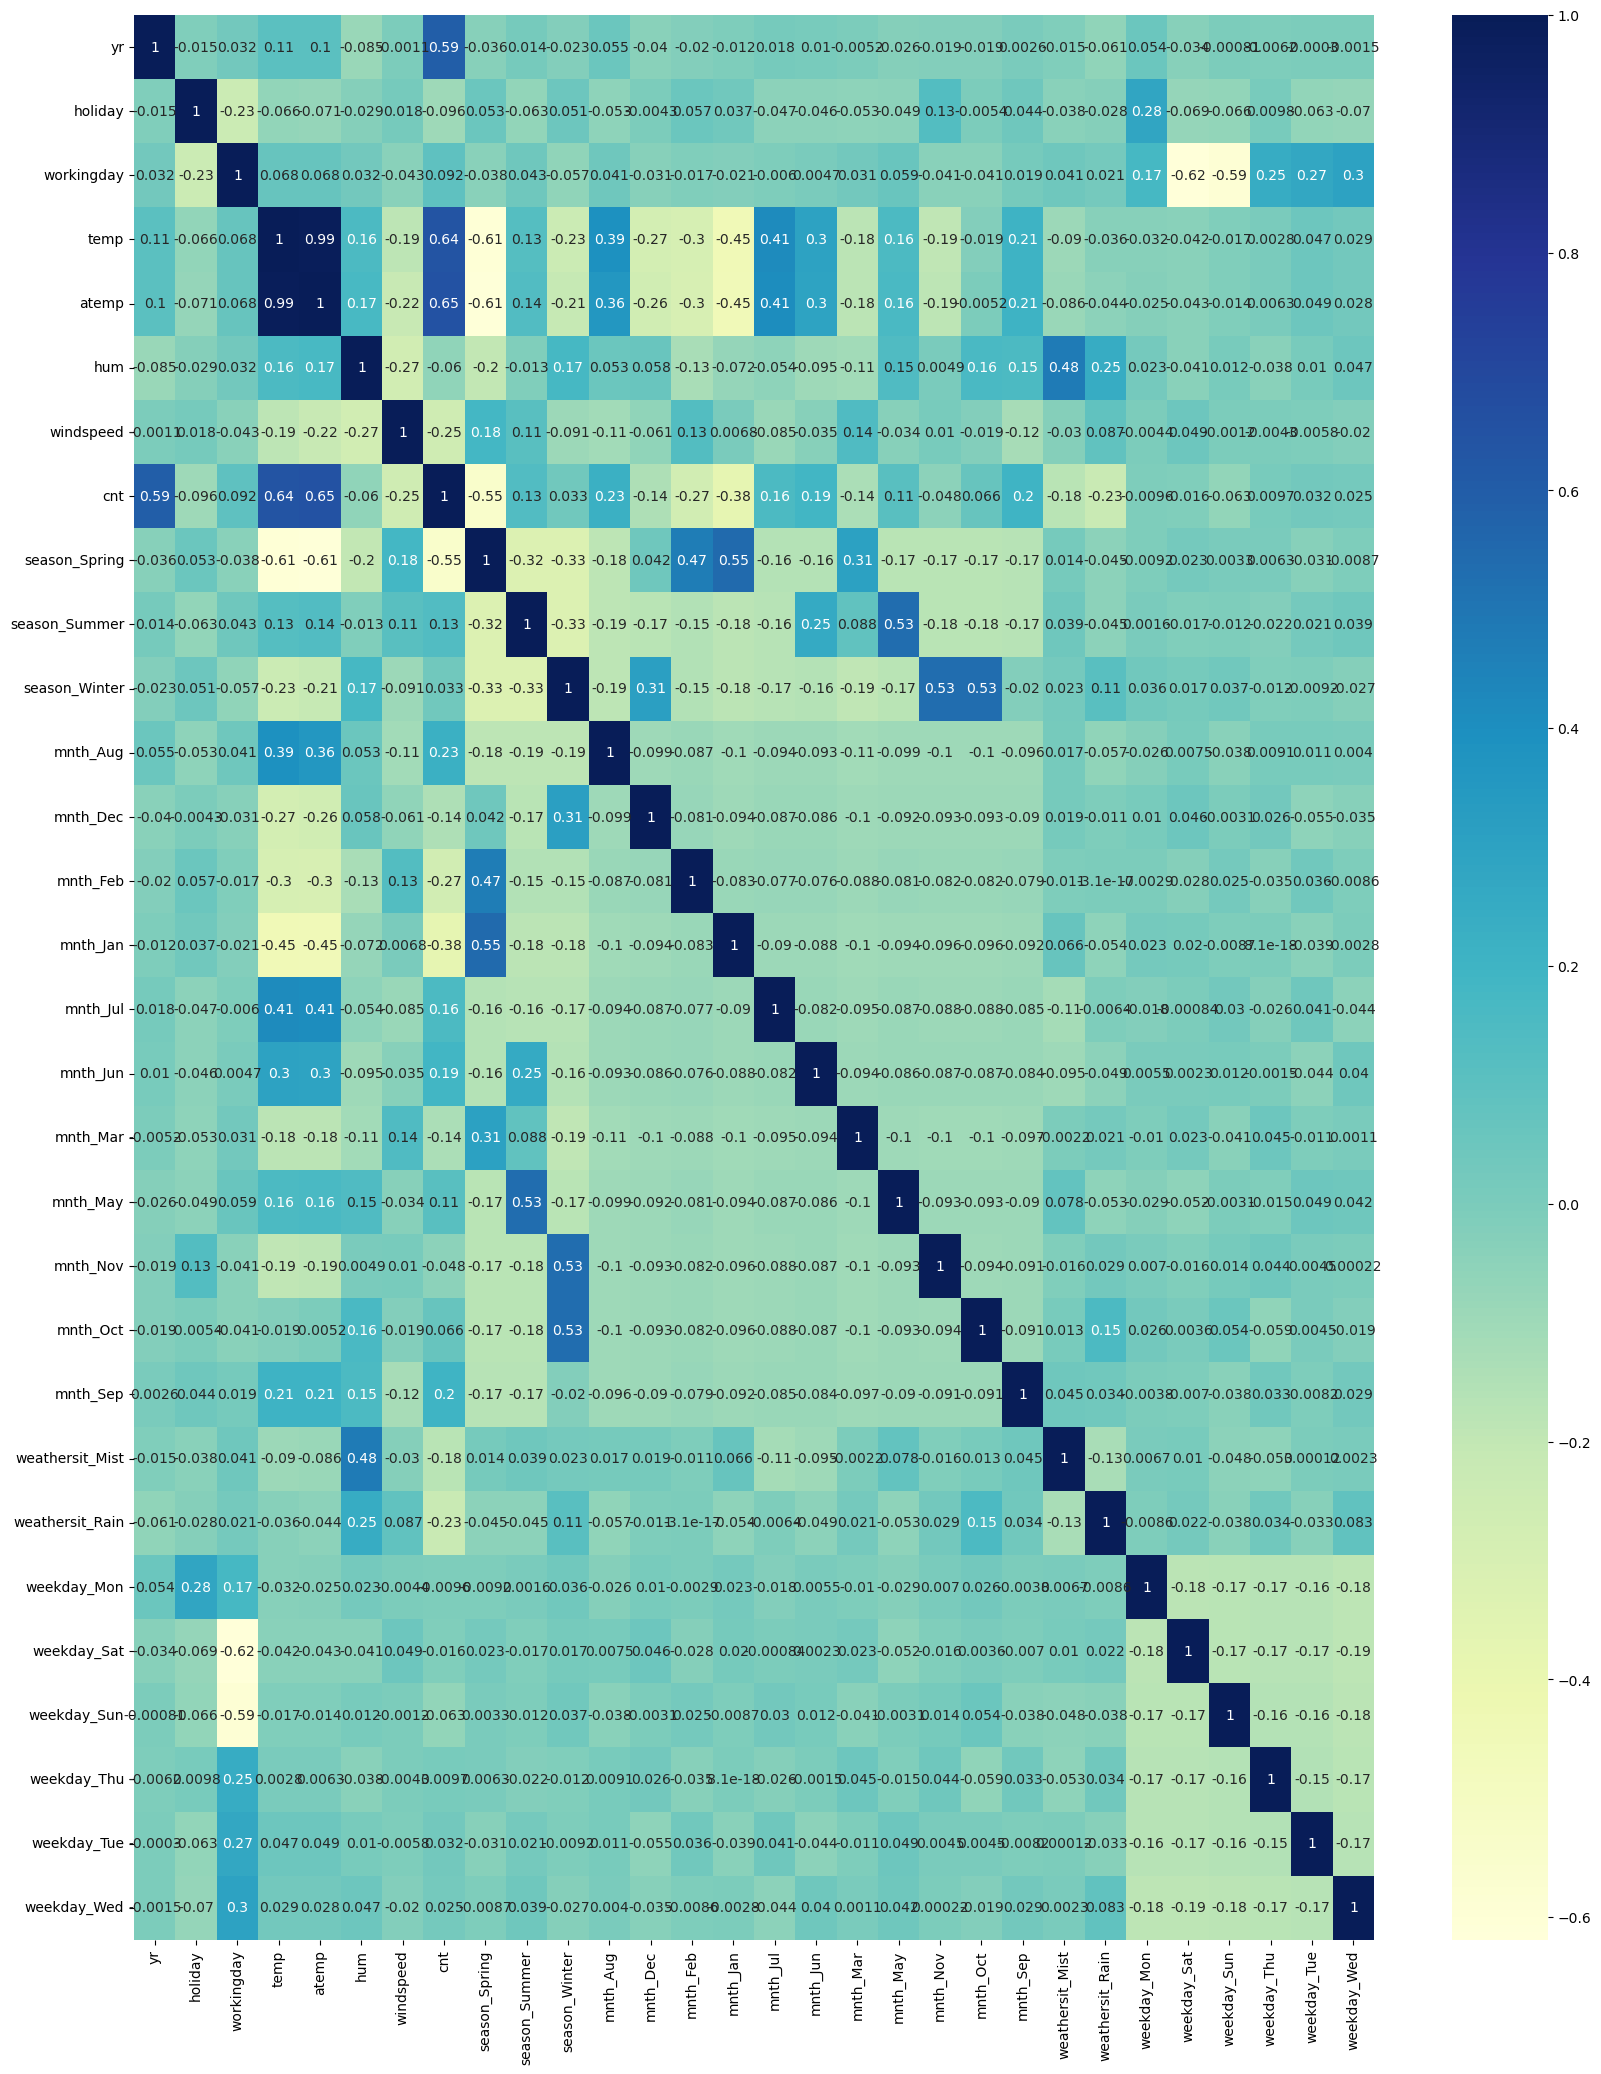

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As can be seen from the map, `temp` and `atemp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

Dividing into X and Y sets for the model building

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

### 6. Building model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [46]:
# Running RFE with the output number of the variable equal to a half features
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=None)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 14),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Rain', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 15),
 ('weekday_Wed', False, 12)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 14)

In [51]:
# Adding a constant variable 
X_train_lm_1 = sm.add_constant(X_train_rfe)

In [52]:
X_train_lm_1.head()

,const,yr,holiday,temp,atemp,hum,windspeed,season_Spring,season_Winter,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Mist,weathersit_Rain
653,1.0,1,0,0.509875,0.501181,0.575330,0.300930,0,1,0,0,0,0,0,0
576,1.0,1,0,0.815254,0.766343,0.725680,0.264678,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442419,0.438960,0.640148,0.255374,1,0,0,0,0,0,1,0
728,1.0,1,0,0.245214,0.200315,0.498042,0.663138,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395624,0.391966,0.504534,0.188643,0,0,0,0,0,0,1,0


In [53]:
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

In [54]:
# Check the parameters obtained
lm_1.params

const              0.351628
yr                 0.231151
holiday           -0.090911
temp               0.368381
atemp              0.097454
hum               -0.158523
windspeed         -0.172399
season_Spring     -0.101145
season_Winter      0.061520
mnth_Jan          -0.038853
mnth_Jul          -0.075920
mnth_Nov          -0.030977
mnth_Sep           0.059884
weathersit_Mist   -0.055435
weathersit_Rain   -0.245153
dtype: float64

In [55]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.90e-187
Time:                        05:32:10   Log-Likelihood:                 507.80
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     495   BIC:                            -922.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3516      0.032     

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.


checking VIF for multicolinearity
##### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features     VIF
3             atemp  352.04
2              temp  351.66
4               hum   23.80
5         windspeed    4.17
6     season_Spring    2.92
7     season_Winter    2.62
12  weathersit_Mist    2.24
0                yr    2.07
8          mnth_Jan    1.67
10         mnth_Nov    1.59
9          mnth_Jul    1.41
13  weathersit_Rain    1.23
11         mnth_Sep    1.21
1           holiday    1.06


In [57]:
# Dropping atemp variable because p-value and VIF of atemp variable is 0.474 and 352.04 it is greater than 0.05 and 5
X_train_rfe = X_train_rfe.drop('atemp', axis=1)

X_train_lm_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model
print(lm_2.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.69e-188
Time:                        05:32:10   Log-Likelihood:                 507.53
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3532      0.032     

,Features,VIF
3,hum,23.28
2,temp,15.99
4,windspeed,4.07
5,season_Spring,2.91
6,season_Winter,2.59
11,weathersit_Mist,2.24
0,yr,2.07
7,mnth_Jan,1.66
9,mnth_Nov,1.59
8,mnth_Jul,1.41


In [58]:
# Dropping mnth_Nov variable because p-value of temp variable is 0.072 and it is greater than 0.05
X_train_rfe = X_train_rfe.drop('mnth_Nov', axis=1)

X_train_lm_3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model
print(lm_3.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          5.59e-189
Time:                        05:32:10   Log-Likelihood:                 505.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3474      0.031     

,Features,VIF
3,hum,23.25
2,temp,15.92
4,windspeed,4.03
5,season_Spring,2.90
10,weathersit_Mist,2.23
6,season_Winter,2.11
0,yr,2.07
7,mnth_Jan,1.66
8,mnth_Jul,1.41
11,weathersit_Rain,1.21


In [59]:
# Dropping hum variable because VIF of mnth_Jul variable is 23.25 and it is greater than 5
X_train_rfe = X_train_rfe.drop('hum', axis=1)

X_train_lm_4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model
print(lm_4.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          1.14e-186
Time:                        05:32:10   Log-Likelihood:                 497.57
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     498   BIC:                            -920.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2657      0.025     

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,season_Spring,2.25
0,yr,2.06
6,mnth_Jan,1.60
9,weathersit_Mist,1.53
5,season_Winter,1.40
7,mnth_Jul,1.36
8,mnth_Sep,1.20
10,weathersit_Rain,1.08


Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.

<font color=red>Results: Now the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

Hence, we finalise `lm_4` as the final model to proceed with the future predictions.
</font>

### 7. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_cnt = lm_4.predict(X_train_lm_4)

<Figure size 2000x1500 with 0 Axes>

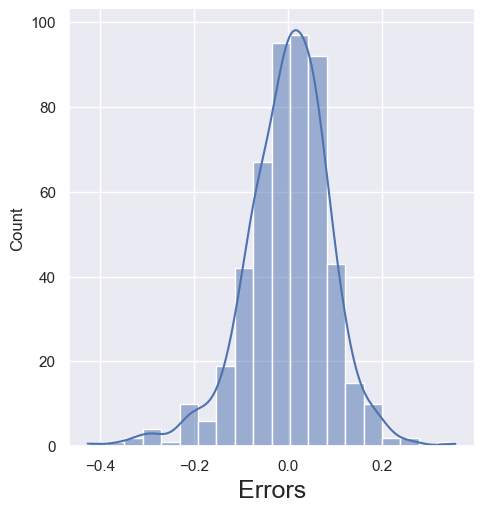

In [61]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(20,15))
sns.set_theme()
sns.displot((y_train - y_train_cnt), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

<font color=red>Results: the error terms are centred around 0 and follows a normal distribution, this is accordance with the stated assumptions of linear regression.</font>

<b>Cross-verifying the above conclusion using a qq-plot as well:</b>

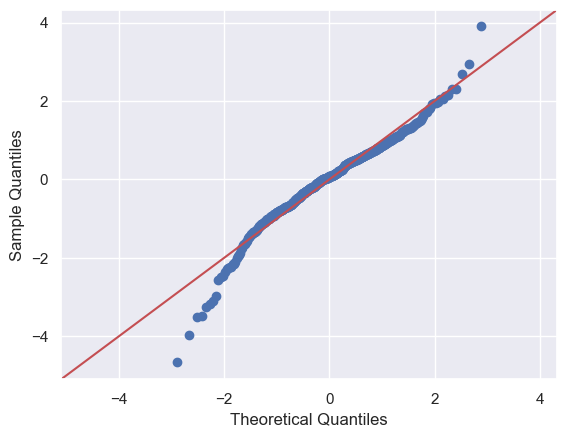

In [62]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

### 8. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

In [63]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weathersit_Mist,weathersit_Rain,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558972,0.533107,0.638521,0.313450,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.319635,0.027397,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233671,0.217889,0.148978,0.159911,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.467403,0.163612,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046794,0.025991,0.261954,-0.042669,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354603,0.344841,0.527257,0.198588,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558797,0.549226,0.627782,0.299647,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759192,0.714229,0.743972,0.403272,0.672745,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984503,0.981097,1.002164,0.807507,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
X_test = X_test[X_train_lm_4.columns[1:]]
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Making predictions using the fourth model
y_pred_m4 = lm_4.predict(X_test_m4)

<b>Calculating r-squared</b>

R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [67]:
from sklearn.metrics import r2_score
print("Test R-squared: ", r2_score(y_test, y_pred_m4))

Test R-squared:  0.803650166732512


<font color=red>Results: We can see that the r_squared on the test set is `0.803` and the r-squared on the trained set `0.835` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.</font>

### 9. Model Evaluation

Text(0, 0.5, 'y_pred')

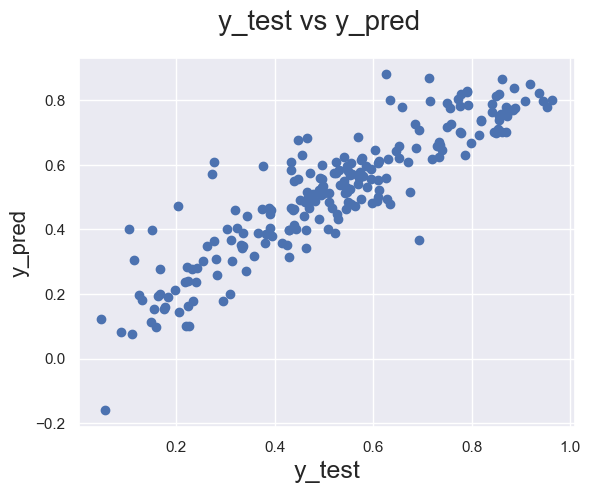

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

<font color=red>Results: We can colude that the final model fit isn't by chance, and has descent predictive power.</font>

<b>Getting the variable names and the coefficient values for the final equation of the best fitted line based on `lm_4` final model</b>

In [69]:
param = pd.DataFrame(lm_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.433502
0,const,0.265718
1,yr,0.234842
9,mnth_Sep,0.058635
6,season_Winter,0.043219
7,mnth_Jan,-0.042698
8,mnth_Jul,-0.069255
10,weathersit_Mist,-0.080177
2,holiday,-0.097741


<font color=red><b>Final Results:</b></font>

We can see that the equation of our best fitted line is:

$ cnt = 0.434 \times temp + 0.235 \times yr + 0.059 \times mnth_Sep + 0.043 \times season_Winter - 0.043 \times mnth_Jan - 0.069 \times mnth_Jul - 0.080 \times weathersit_Mist - -0.098 \times holiday - 0.101 \times season_Spring - 0.148 \times windspeed - 0.288 \times weathersit_Rain + 0.266 $

<b>All the positive coefficients like `temp`, `yr`, `mnth_Sep` and `season_Winter` indicate that an increase in these values will lead to an increase in the value of `cnt`.</b>

<b>All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of `cnt`.</b>

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

Top three features contributing significantly to explain the demand bikes are: `temp`, `season_Winter` and `mnth_Sep` because the features based on count of 2 years so we will not use `yr` for demand shared bikes.

So, it can be clearly concluded that the variables `temp` , `mnth` and `season` are significant in predicting the demand for shared bikes .

### <font color=red><b>Final Recommendations for the Company:</b></font>

The `September` should be considered by the company as they have a higher demand as compared to other months.

With an increase in `temp` the demand also increases, so it should keep track the weather conditions.

During the Winter `season` the demand rises, so it should be well prepared to meet the high demand.